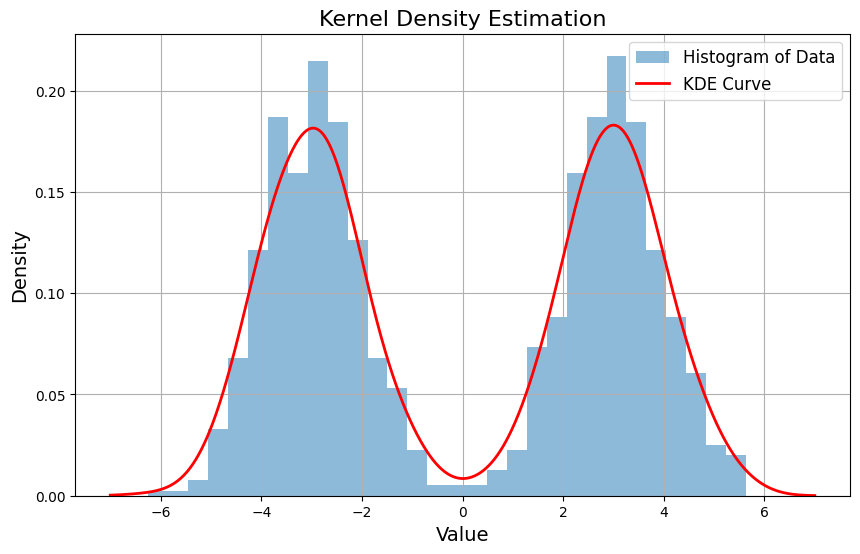

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generate synthetic data
np.random.seed(42)
# Create a bimodal distribution
data = np.concatenate([
    np.random.normal(loc=-3, scale=1, size=500),
    np.random.normal(loc=3, scale=1, size=500)
])

# Reshape data for KDE (requires 2D array)
data = data[:, np.newaxis]

# Fit Kernel Density Estimation model
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data)

# Evaluate KDE on a range of values
x_plot = np.linspace(-7, 7, 1000)[:, np.newaxis]
log_density = kde.score_samples(x_plot)
density = np.exp(log_density)

# Plot the results
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogram of Data')
plt.plot(x_plot[:, 0], density, label='KDE Curve', color='red', linewidth=2)
plt.title('Kernel Density Estimation', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


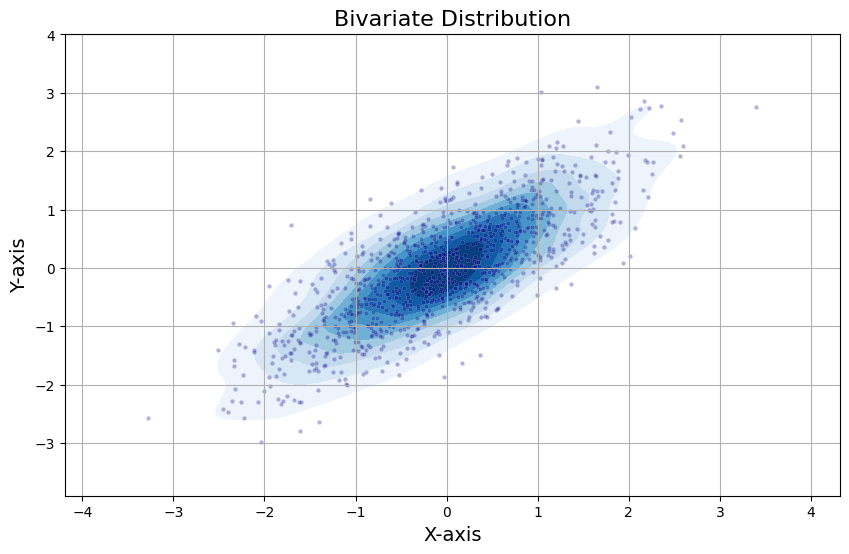

In [2]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic bivariate data
np.random.seed(42)
# Create a bivariate normal distribution
mean = [0, 0]  # Mean for x and y
cov = [[1, 0.8], [0.8, 1]]  # Covariance matrix
data = np.random.multivariate_normal(mean, cov, size=1000)

# Convert data to two separate variables for clarity
x = data[:, 0]  # x-axis data
y = data[:, 1]  # y-axis data

# Plot the bivariate distribution using seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(x=x, y=y, cmap="Blues", fill=True, thresh=0.05)
sns.scatterplot(x=x, y=y, color='darkblue', alpha=0.3, s=10)
plt.title("Bivariate Distribution", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.grid()
plt.show()


In [3]:
!pip install bokeh geopandas pyproj

In [ ]:
import geopandas as gpd
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, HoverTool, LinearColorMapper, ColorBar
from bokeh.palettes import Viridis256
import json
# Load a sample geospatial dataset (e.g., natural earth data for world boundaries)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Convert to GeoJSON format
geojson_data = world.to_json()
# Create a GeoJSONDataSource from the data
geo_source = GeoJSONDataSource(geojson=geojson_data)
# Define a color mapper based on the population
color_mapper = LinearColorMapper(palette=Viridis256, low=world["pop_est"].min(), high=world["pop_est"].max())
# Create the figure
p = figure(
    title="World Map with Population Data",
    tools="pan,wheel_zoom,reset,save",
    active_scroll="wheel_zoom",
    x_axis_location=None,
    y_axis_location=None
)
p.grid.grid_line_color = None
# Add patches (polygons) for the countries
p.patches(
    'xs', 'ys',
    source=geo_source,
    fill_color={'field': 'pop_est', 'transform': color_mapper},
    line_color="white",
    line_width=0.5
)
# Add a hover tool
hover = HoverTool(
    tooltips=[
        ("Country", "@name"),
        ("Population", "@pop_est")
    ]
)
p.add_tools(hover)
# Add a color bar
color_bar = ColorBar(
    color_mapper=color_mapper,
    label_standoff=12,
    location=(0, 0),
    title="Population"
)
p.add_layout(color_bar, 'right')
# Output the result to an HTML file
output_file("geospatial_bokeh_interactive.html")
show(p)

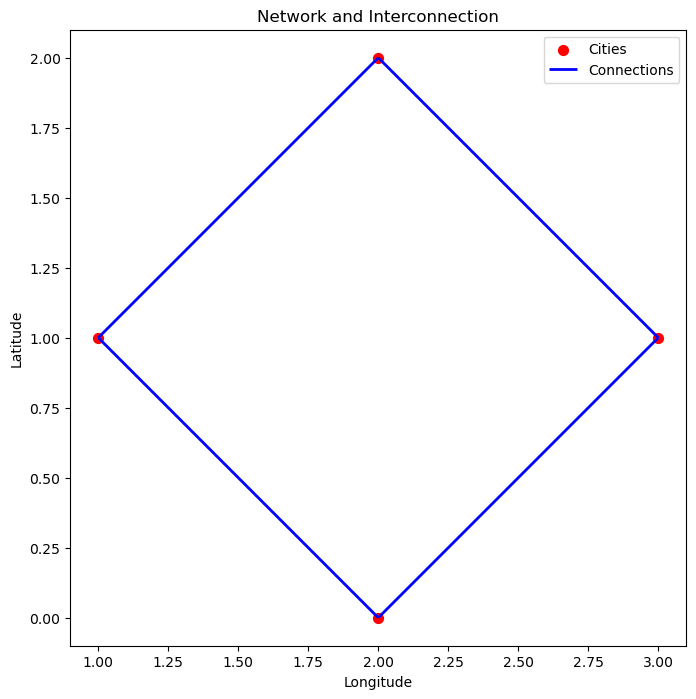

In [9]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
# Sample geospatial data (replace with your data)
cities = gpd.GeoDataFrame({
    'city': ['City A', 'City B', 'City C', 'City D'],
    'geometry': [Point(1, 1), Point(2, 2), Point(3, 1), Point(2, 0)],
})
connections = [
    ('City A', 'City B'),
    ('City B', 'City C'),
    ('City C', 'City D'),
    ('City D', 'City A'),
]
# Create LineString geometries for connections
lines = []
for city1, city2 in connections:
    point1 = cities[cities['city'] == city1].geometry.iloc[0]
    point2 = cities[cities['city'] == city2].geometry.iloc[0]
    line = LineString([point1, point2])
    lines.append(line)
# Create GeoDataFrame for connections
connections_gdf = gpd.GeoDataFrame({'geometry': lines})
# Plot the data
fig, ax = plt.subplots(figsize=(8, 8))
cities.plot(ax=ax, marker='o', color='red', markersize=50, label='Cities')
connections_gdf.plot(ax=ax, color='blue', linewidth=2, label='Connections')
# Customize the plot
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Network and Interconnection')
ax.legend()
plt.show()

In [40]:
!pip install requests beautifulsoup4

In [41]:
# Install necessary libraries
# !pip install requests beautifulsoup4

import requests
from bs4 import BeautifulSoup
import os
import shutil

# Step 1: Define the URL to scrape
url = "https://en.wikipedia.org/wiki/Main_Page"  # Wikipedia main page

# Step 2: Make an HTTP GET request to fetch the HTML content
response = requests.get(url)
if response.status_code == 200:
    print("Website fetched successfully.")
else:
    print(f"Failed to fetch the website. Status code: {response.status_code}")
    exit()

# Step 3: Parse the HTML using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 4: Extract the first image source (you can modify to target specific elements)
image_tag = soup.find('img')
if image_tag and 'src' in image_tag.attrs:
    image_url = image_tag['src']
    if not image_url.startswith('http'):  # Handle relative URLs
        image_url = requests.compat.urljoin(url, image_url)
    print(f"Image URL: {image_url}")
else:
    print("No image found on the page.")
    exit()

# Step 5: Retrieve the image over HTTP
image_response = requests.get(image_url, stream=True)
if image_response.status_code == 200:
    print("Image retrieved successfully.")
    # Step 6: Save the image locally
    image_filename = os.path.basename(image_url)
    with open(image_filename, 'wb') as f:
        shutil.copyfileobj(image_response.raw, f)
    print(f"Image saved as {image_filename}.")
else:
    print(f"Failed to fetch the image. Status code: {image_response.status_code}")

# Step 7: Additional Scraping (e.g., extracting all hyperlinks)
print("\nExtracting all hyperlinks from the page:")
for link in soup.find_all('a', href=True):
    href = link['href']
    full_url = requests.compat.urljoin(url, href)  # Handle relative URLs
    print(full_url)


Website fetched successfully.
Image URL: https://en.wikipedia.org/static/images/icons/wikipedia.png
Image retrieved successfully.
Image saved as wikipedia.png.

Extracting all hyperlinks from the page:
https://en.wikipedia.org/wiki/Main_Page#bodyContent
https://en.wikipedia.org/wiki/Main_Page
https://en.wikipedia.org/wiki/Wikipedia:Contents
https://en.wikipedia.org/wiki/Portal:Current_events
https://en.wikipedia.org/wiki/Special:Random
https://en.wikipedia.org/wiki/Wikipedia:About
https://en.wikipedia.org/wiki/Wikipedia:Contact_us
https://en.wikipedia.org/wiki/Help:Contents
https://en.wikipedia.org/wiki/Help:Introduction
https://en.wikipedia.org/wiki/Wikipedia:Community_portal
https://en.wikipedia.org/wiki/Special:RecentChanges
https://en.wikipedia.org/wiki/Wikipedia:File_upload_wizard
https://en.wikipedia.org/wiki/Main_Page
https://en.wikipedia.org/wiki/Special:Search
https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en
https://en

In [2]:
import requests

# Web service URL (using JSONPlaceholder for testing)
url = "https://jsonplaceholder.typicode.com/posts"  # Example URL for posts

# Make a request to the web service
try:
    response = requests.get(url)

    # Check if the request was successful
    response.raise_for_status()  # Raise an exception for HTTP errors (e.g., 404, 500)

    # Parse the JSON response
    posts = response.json()  # JSON data is parsed directly into Python objects

    # Access data from JSON response
    for post in posts:
        title = post['title']
        body = post['body']
        print(f"Title: {title}, Body: {body}")

except requests.exceptions.RequestException as e:
    print(f"Error with the request: {e}")


Title: sunt aut facere repellat provident occaecati excepturi optio reprehenderit, Body: quia et suscipit
suscipit recusandae consequuntur expedita et cum
reprehenderit molestiae ut ut quas totam
nostrum rerum est autem sunt rem eveniet architecto
Title: qui est esse, Body: est rerum tempore vitae
sequi sint nihil reprehenderit dolor beatae ea dolores neque
fugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis
qui aperiam non debitis possimus qui neque nisi nulla
Title: ea molestias quasi exercitationem repellat qui ipsa sit aut, Body: et iusto sed quo iure
voluptatem occaecati omnis eligendi aut ad
voluptatem doloribus vel accusantium quis pariatur
molestiae porro eius odio et labore et velit aut
Title: eum et est occaecati, Body: ullam et saepe reiciendis voluptatem adipisci
sit amet autem assumenda provident rerum culpa
quis hic commodi nesciunt rem tenetur doloremque ipsam iure
quis sunt voluptatem rerum illo velit
Title: nesciunt quas odio, Body: repudiandae veniam q